<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/project%207%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
 - Identify outliers and quantify them columns that contain outliers
>- 5) EDA
>- 6) Transform data if needed
>- 7) Build ANN for classification 
    - Use sequential model from tensorflow keras 
    - Compile models with class weights
    - compile models with early stopping feature to be more efficient if model doens't improve
>- 8) Tune ANN according to ROC-AUC curve
    - Use np.argmax of [tpr- fpr] and then pass this index to the threholds array
    - Use threshold to improve recall scores by changing default threshold parameters 
    - Use keras classifier to hypertune model to get optimal output by using
  best params 

>- 9) Conclusion and business insight. 


### Import libraries needed

In [3]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 42 kB/s 
     |████████████████████████████████| 449 kB 61.4 MB/s 
     |████████████████████████████████| 3.8 MB 57.4 MB/s 
     |████████████████████████████████| 50 kB 9.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=84285b809dd16358d71d6ba0415b8373e9fe97b45f21cbb92a4cb1e1ce0356b9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

# import function

%matplotlib inline
import seaborn as sns


# import scaling 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# neural network libraries
import tensorflow as tf
#from tensorflow import keras # importing keras library
from tensorflow.keras import Sequential  # importing the Sequential Model
#from keras.layers import Dense       # importing Dense layer

from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam # Optimizer
#from tensorflow.keras.optimizers import leakyRelu
from tensorflow.keras.layers import LeakyReLU





# import sklearn.metrics

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

from google.colab import files
import io




try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

data.shape

Saving bank.csv to bank.csv


(10000, 14)

### Data Dict
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [5]:
data.shape

(10000, 14)

### Shape of the data
- The data has 10k rows and 14 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

### Insights 

- Balance has a slight disparity from mean and median values
- HAsCrCard has a slight disparity from the mean and median values

In [8]:
# check for sum of null values

data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# define cat_ cols and numerical columns for EDA 


In [10]:
# drop the  Sl_no and customer key column as this will add no value to the cluster analysis
#data = data.drop(["Sl_No","Customer Key"], axis = 1)
#data.describe()

In [11]:
# insights for the descriptive stats: Avg Credit card and total visits online appear to have outliers
#  - This is due to the fact that the median and mean values are quite different. In credit limit there's 
# a diff. of approx 18,000 and with total visits_online there is a smaller differnece.  

In [12]:
# check for class imbalances 

data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### 5) - Bivariate Analyis
- pairplot
- correlation

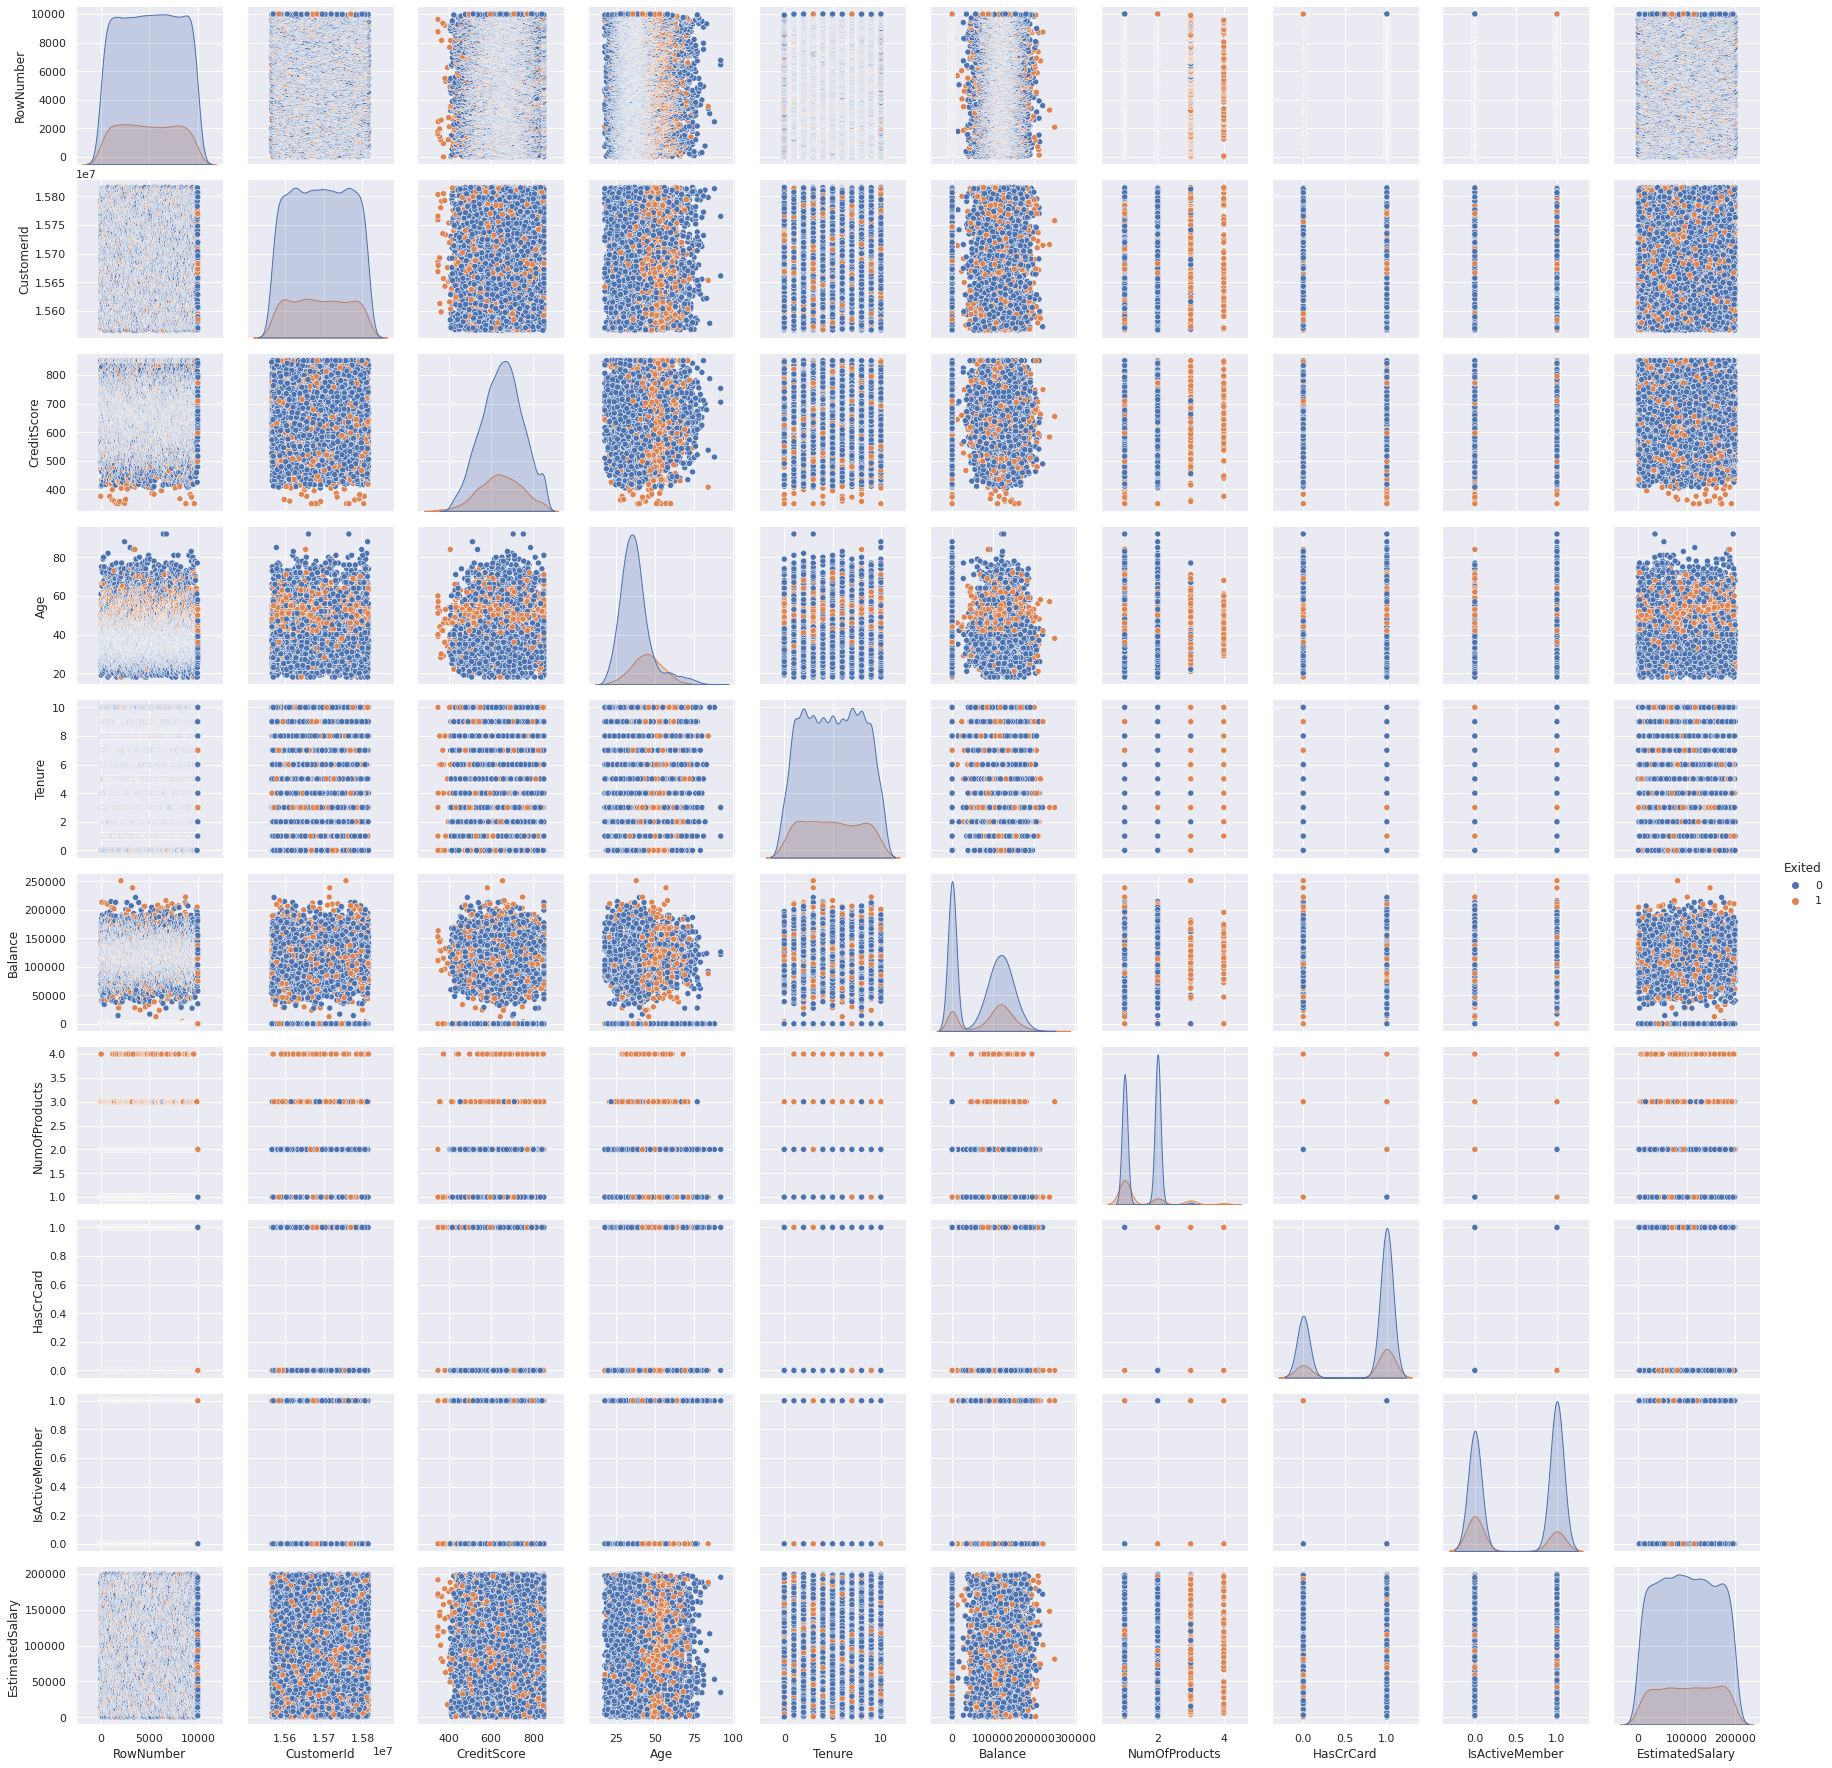

In [13]:
sns.pairplot(data,diag_kind = 'kde', hue = "Exited")

In [14]:
# correlation for continous variables
cat_list = ["NumOfProducts","HasCrCard","IsActiveMember","Tenure"]
num_col = data.columns.drop(cat_list)
num_col

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

In [16]:
tmp_data= data.copy()
numeric_col =[  'CreditScore', 
        'Age', 'Balance', 'EstimatedSalary']

In [17]:
corr_df = pd.DataFrame(data= tmp_data,index=tmp_data.index, columns =numeric_col)
corr_df = corr_df.corr()

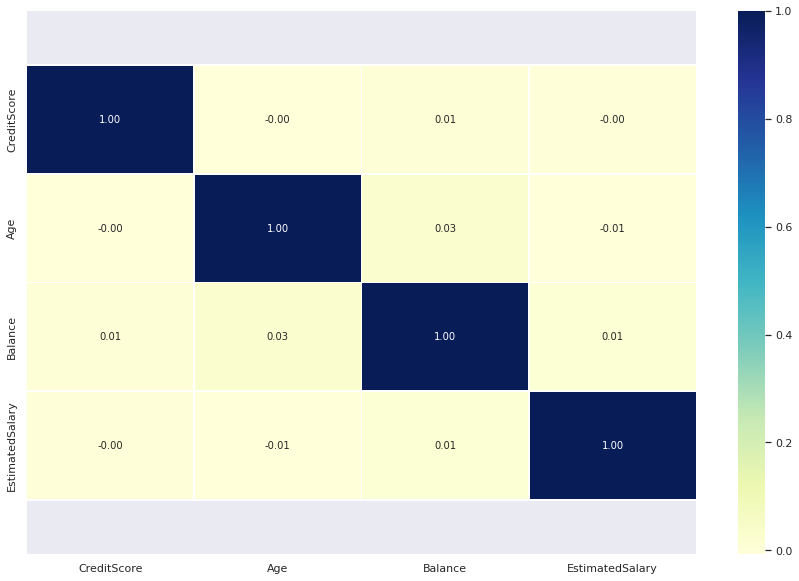

In [18]:
make_corr_matrix(corr_df)

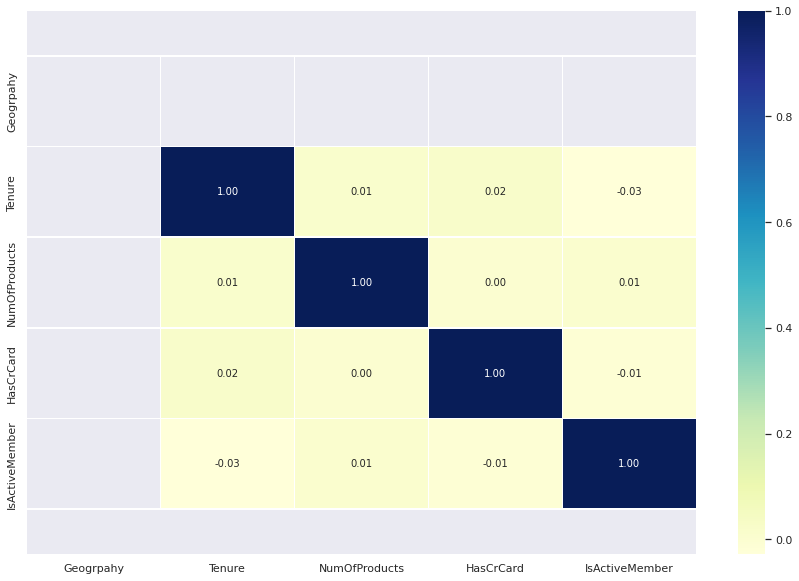

In [19]:
# let's check the categorical columns 

cat_corr_df = pd.DataFrame(data= tmp_data,index=tmp_data.index, columns =["Geogrpahy","Gender","Tenure","NumOfProducts","HasCrCard"
,"IsActiveMember"])
cat_corr_df = cat_corr_df.corr()
make_corr_matrix(cat_corr_df)

In [20]:
tmp_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [21]:
# load bivariate functions

# edafunctions
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """


    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram




In [22]:
def distribution_plot_wrt_target(data, predictor, target):
    
    """
    box plot and histogram combined

    data: dataframe
    feature: dataframe column
    target: target classification colummn
  
    """
    
    
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (with flier removed) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",
    )

    plt.tight_layout()
    plt.show()
# define column list of tmp_data 

In [23]:
num_col

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
numeric_col =[  'CreditScore', 
        'Age', 'Balance', 'EstimatedSalary']

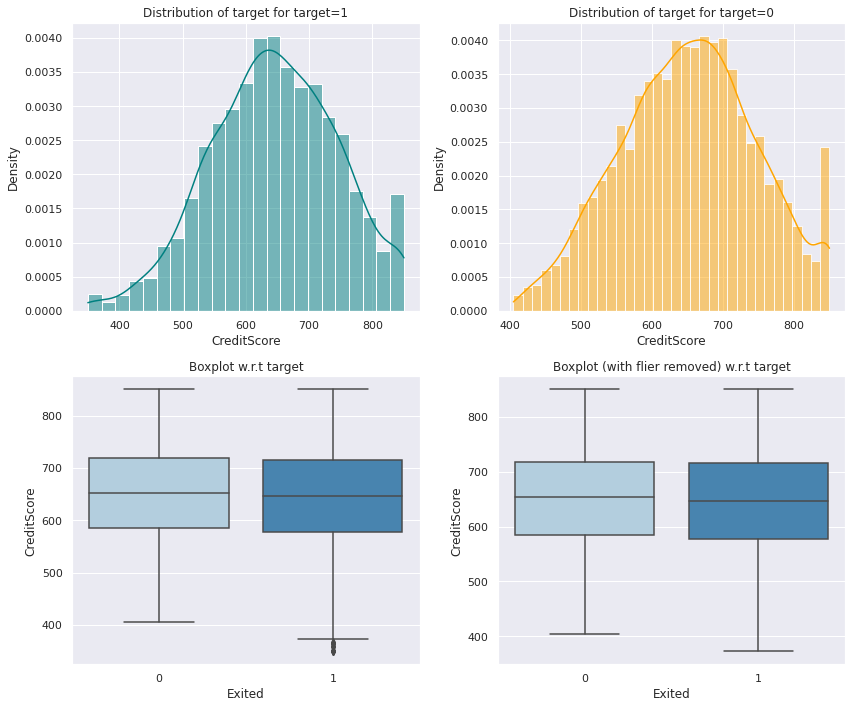

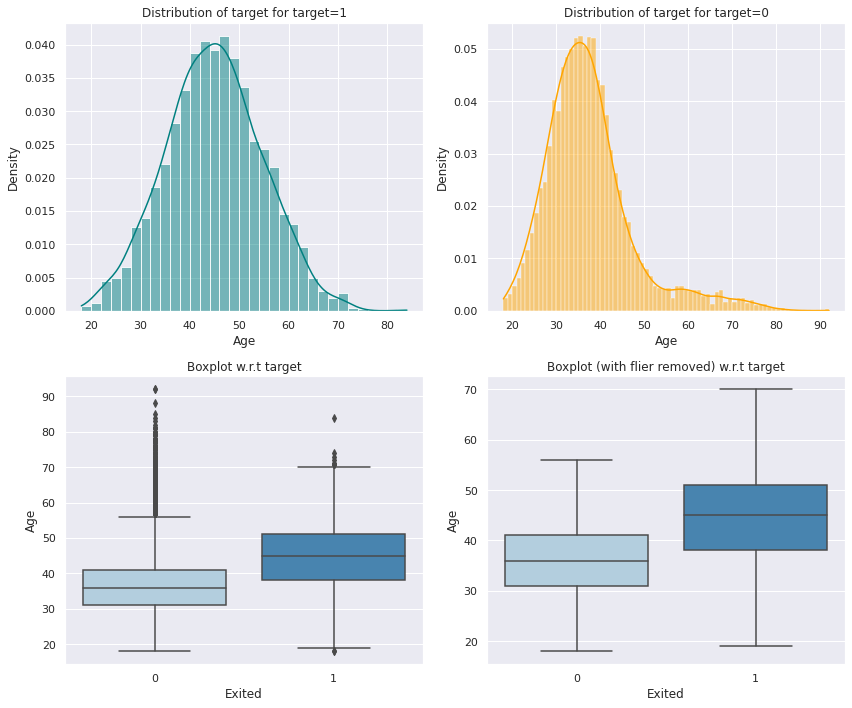

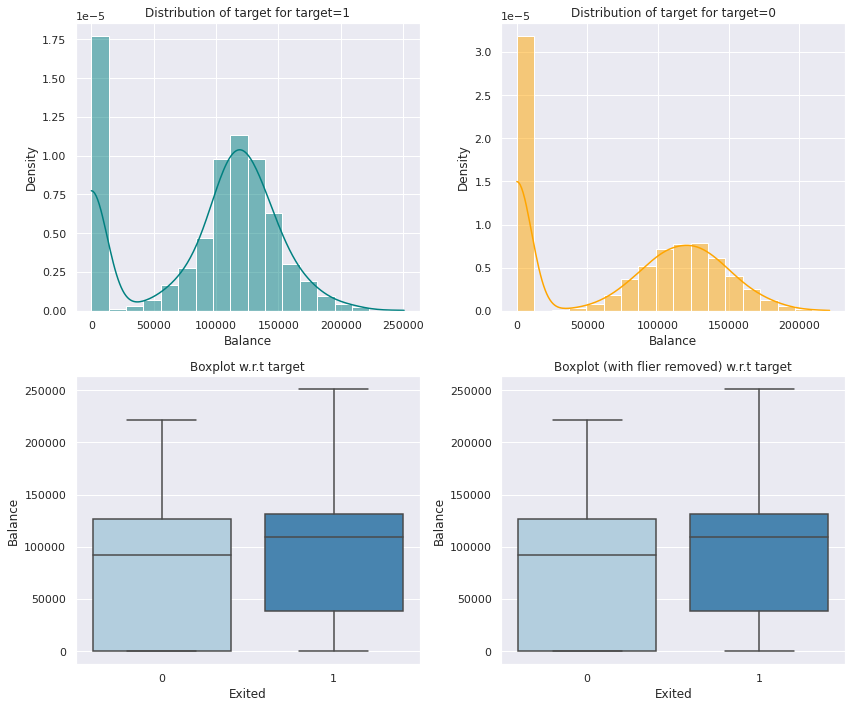

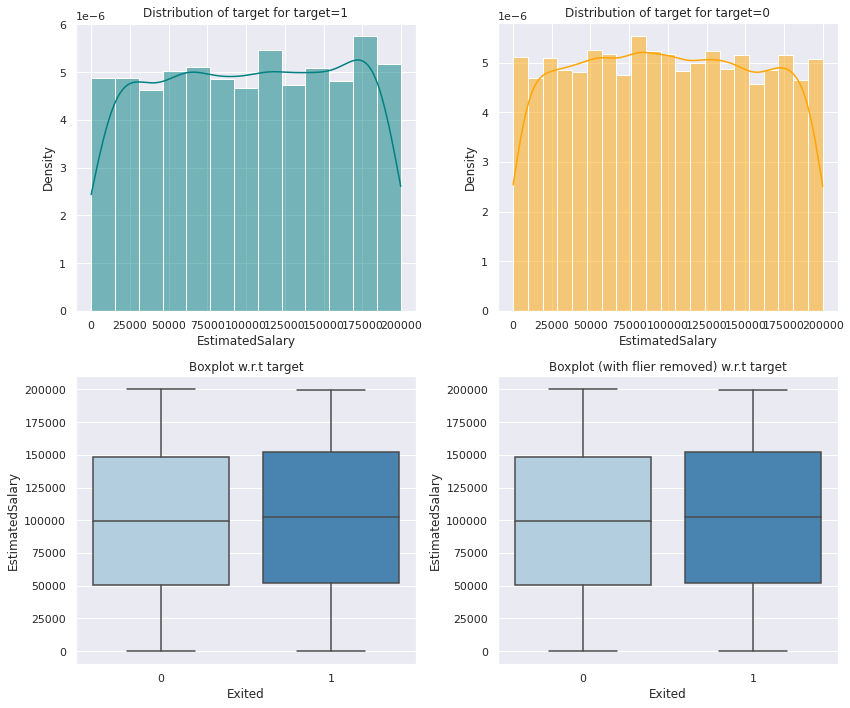

In [25]:


for col in numeric_col:
  distribution_plot_wrt_target(tmp_data,col,"Exited")
       
        

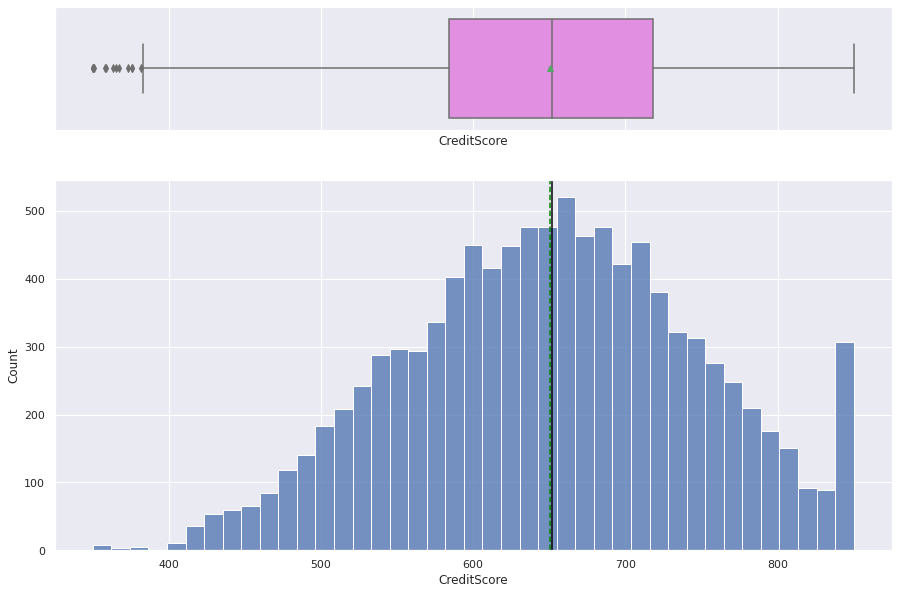

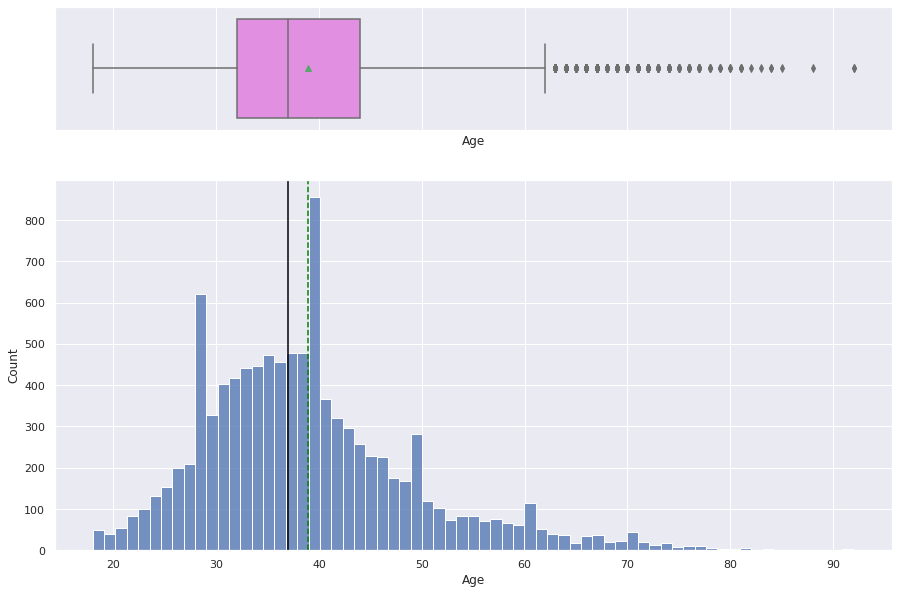

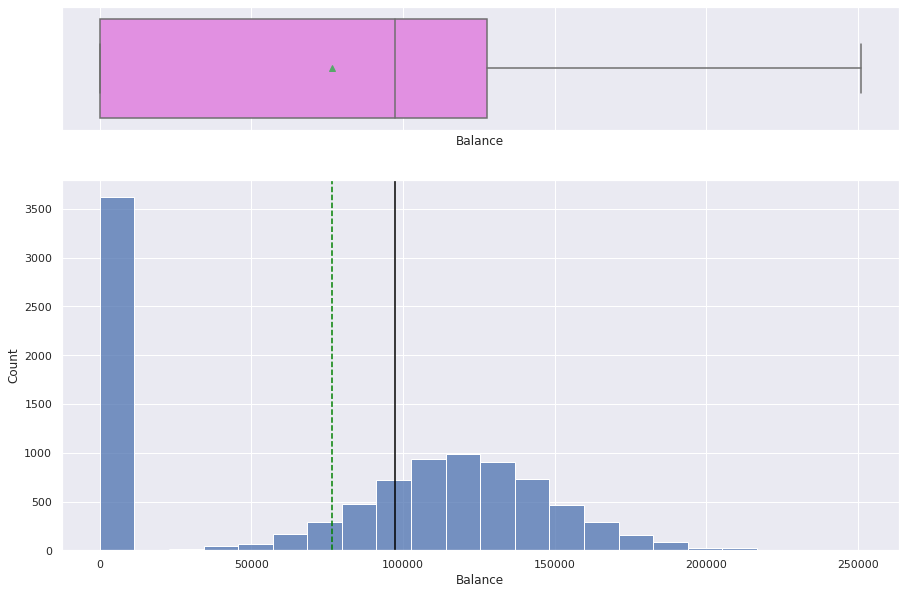

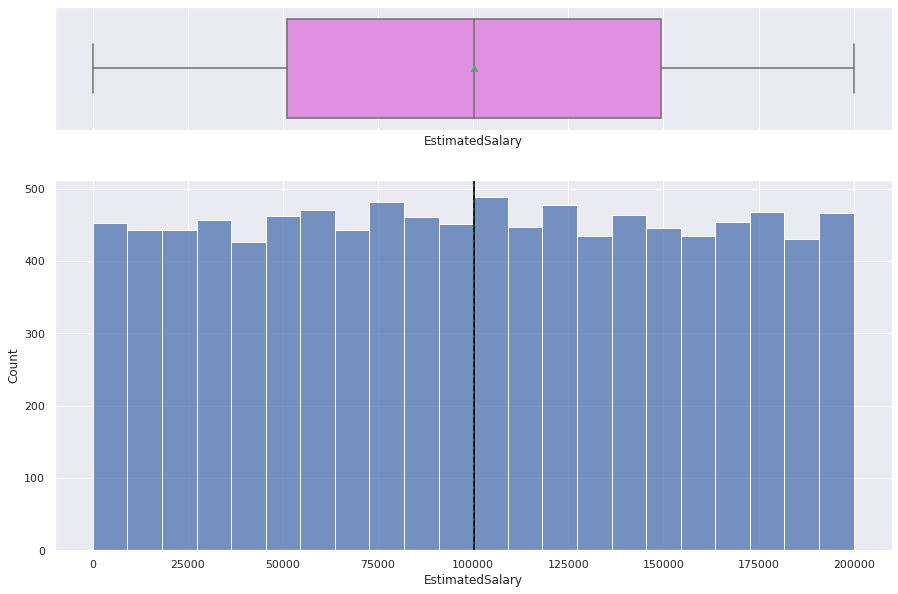

In [26]:
for col in numeric_col:
  histogram_boxplot(tmp_data, col)

### Insights on pairplot.
- 

- looking at the pairplot it is easily determined that none of these variables correlate with one another. They are all independent of each other. 


### Insights for EDA
- Approx 96% of customers have 1-2 products from the bank
- 70% of the customers have a card from the bank
- The banks lowest customer group are the tenured of 10 years
- Credit score looks normally distributed
- The age is slightly skewed to the left for customers that have left the bank
- The estimated salary appears to be a uniform distribution(same prob for any salary)
- There are wuite a few customers that have a 0 balance and this doesnt depend on if the custoemr has left the bank or not. 
- no correlation with categorical values and numerical values

In [27]:
# make copies of original dataset to remove and not remove outliers

out_data = data.copy()
tmp_data = data.copy()

In [28]:
# identify outliers 
# use IQR to identify outliers. calculate 1st and 2nd quartile, then identify data points that are outside
# of the 4 * IQR range
balance_quartiles =np.quantile(out_data['Balance'][out_data['Balance'].notnull()], [.25, .75])
balance_quartiles_iqr = 4 * (balance_quartiles[1] - balance_quartiles[0])
Products_quartiles =np.quantile(out_data['NumOfProducts'][out_data['NumOfProducts'].notnull()], [.25, .75])
Products_quartiles_iqr = 4 * (Products_quartiles[1] - Products_quartiles[0])
# define the outlier

balance_outlier = out_data.loc[np.abs(out_data["Balance"]-out_data["Balance"].median()) > balance_quartiles_iqr, "Balance"]
product_outlier = out_data.loc[np.abs(out_data["NumOfProducts"]-out_data["NumOfProducts"].median()) > Products_quartiles_iqr, "NumOfProducts"]
len(balance_outlier)+len(product_outlier)


0

### outlier treatment 
- There are no outliers in this dataset

In [29]:
tmp_data.shape

(10000, 14)

In [30]:
#cat_list = list(tmp_data.columns)
#cat_list.remove("Avg_Credit_Limit")

In [31]:
for col in cat_list:
    
    print(100*(data[col].isnull().sum()/len(data[col])))
    print(data[col].name)
    print("-"*60)

0.0
NumOfProducts
------------------------------------------------------------
0.0
HasCrCard
------------------------------------------------------------
0.0
IsActiveMember
------------------------------------------------------------
0.0
Tenure
------------------------------------------------------------


In [32]:
cat_list = ["NumOfProducts","HasCrCard","IsActiveMember","Tenure"]

In [33]:
# Preprocessing data 
# - Remove duplicate values

print("Before dropping of duplciates, data is",tmp_data.shape[0],"rows")
tmp_data.drop_duplicates(inplace=True)
print("after dropping of duplciates, data is",tmp_data.shape[0],"rows")

Before dropping of duplciates, data is 10000 rows
after dropping of duplciates, data is 10000 rows


In [34]:
data.duplicated().sum()

0

In [35]:
# get rid of useless rows which are 'RowNumber', 'CustomerId', 'Surname'

In [36]:
tmp_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


In [37]:
tmp_data.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [38]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [39]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [40]:
# insights there is a class imbalance so weights will need to be applied to the model to account for the class imbalance

In [41]:
data["Geography"].value_counts(0)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [42]:
data_copy = data.copy()

In [43]:
data_copy.drop(columns = ["RowNumber","CustomerId", "Surname"], axis = 1, inplace = True)
data_copy.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [44]:
### 3) Univariate analysis

In [45]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

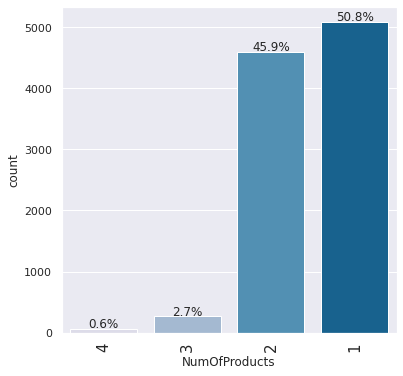

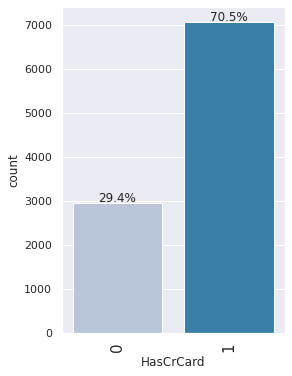

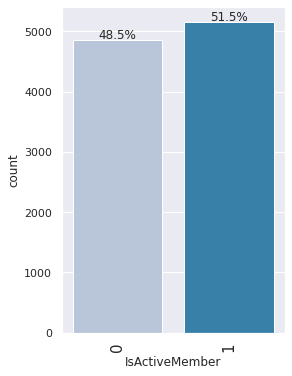

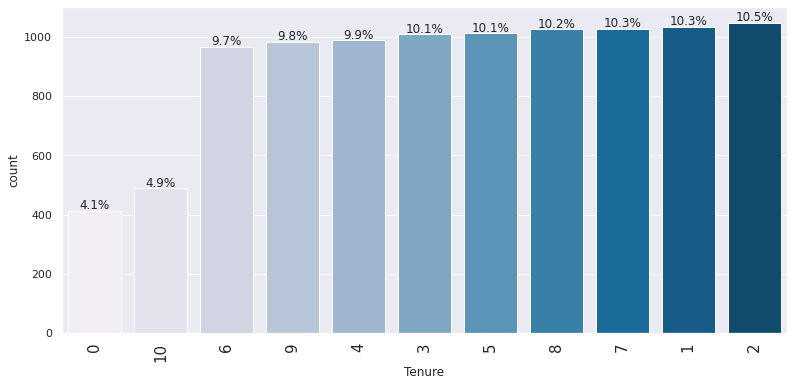

In [46]:
for feature in cat_list:
  if feature == "Total_visits_bank":
    print("#"*50)
    print("1 and 2 visits attribute to the most of the bank visits")
    print("#"*50)
  elif feature == "Total_Credit_Cards":
    print("#"*50)
    print("Customers with the 4,6,7 atttribute to the majority of the total credit cards", 
    "within the customers")
    print("#"*50)
  elif feature == "Total_visits_online":
    print("#"*50)
    print("0-2 visits online attribute to the majority of the online traffic", 
    "The customers don't really like going on the web")
    print("#"*50)
  elif feature == "Total_calls_made":
    print("#"*50)
    print("approx 70% of the customers fall within 0-4 calls made")
    print("#"*50)
  labeled_barplot(tmp_data, feature, perc=True)
  


In [47]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

NumOfProducts     1     2    3   4    All
NumOfProducts                            
4                 0     0    0  60     60
All            5084  4590  266  60  10000
1              5084     0    0   0   5084
2                 0  4590    0   0   4590
3                 0     0  266   0    266
------------------------------------------------------------------------------------------------------------------------


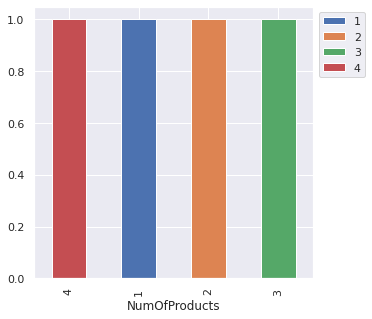

NumOfProducts     1     2    3   4    All
HasCrCard                                
All            5084  4590  266  60  10000
1              3578  3246  190  41   7055
0              1506  1344   76  19   2945
------------------------------------------------------------------------------------------------------------------------


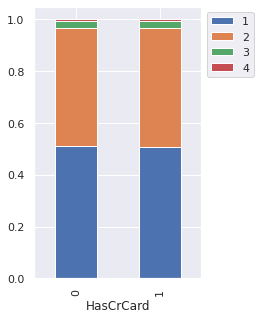

NumOfProducts      1     2    3   4    All
IsActiveMember                            
All             5084  4590  266  60  10000
0               2521  2144  153  31   4849
1               2563  2446  113  29   5151
------------------------------------------------------------------------------------------------------------------------


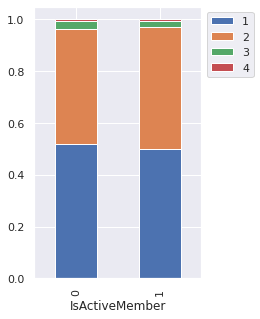

NumOfProducts     1     2    3   4    All
Tenure                                   
All            5084  4590  266  60  10000
2               473   543   21  11   1048
9               500   451   23  10    984
3               529   430   42   8   1009
5               501   468   36   7   1012
7               517   482   24   5   1028
1               568   431   32   4   1035
6               490   456   17   4    967
8               525   468   28   4   1025
10              241   228   17   4    490
4               504   462   20   3    989
0               236   171    6   0    413
------------------------------------------------------------------------------------------------------------------------


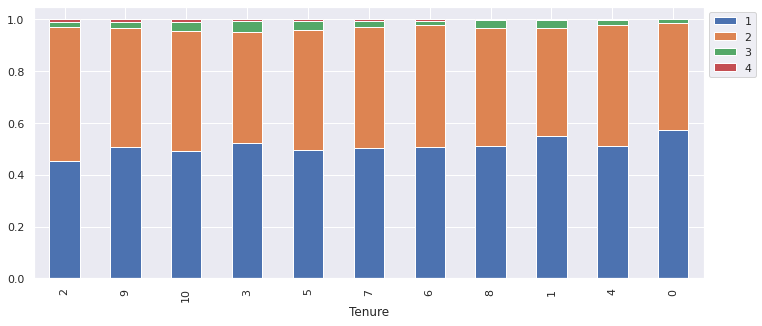

In [48]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"NumOfProducts")

HasCrCard         0     1    All
NumOfProducts                   
All            2945  7055  10000
1              1506  3578   5084
2              1344  3246   4590
3                76   190    266
4                19    41     60
------------------------------------------------------------------------------------------------------------------------


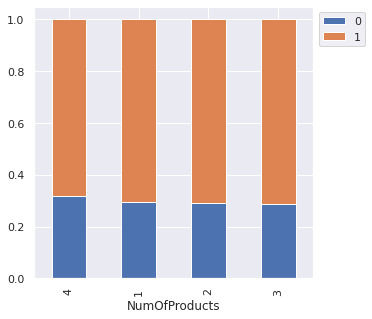

HasCrCard     0     1    All
HasCrCard                   
0          2945     0   2945
All        2945  7055  10000
1             0  7055   7055
------------------------------------------------------------------------------------------------------------------------


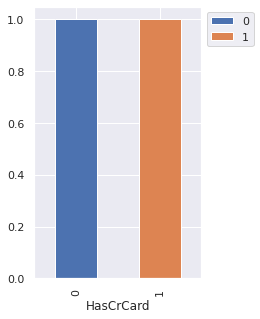

HasCrCard          0     1    All
IsActiveMember                   
All             2945  7055  10000
1               1544  3607   5151
0               1401  3448   4849
------------------------------------------------------------------------------------------------------------------------


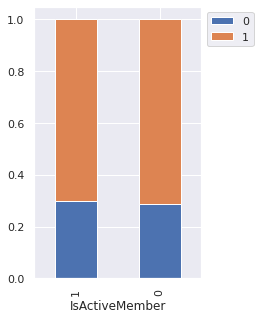

HasCrCard     0     1    All
Tenure                      
All        2945  7055  10000
1           334   701   1035
5           312   700   1012
2           310   738   1048
7           302   726   1028
9           292   692    984
8           283   742   1025
4           280   709    989
3           279   730   1009
6           273   694    967
0           145   268    413
10          135   355    490
------------------------------------------------------------------------------------------------------------------------


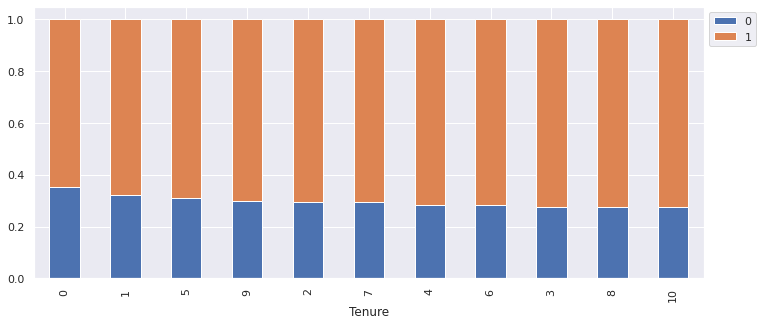

In [49]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"HasCrCard")

IsActiveMember     0     1    All
NumOfProducts                    
All             4849  5151  10000
1               2521  2563   5084
2               2144  2446   4590
3                153   113    266
4                 31    29     60
------------------------------------------------------------------------------------------------------------------------


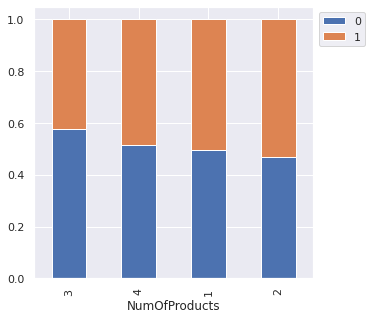

IsActiveMember     0     1    All
HasCrCard                        
All             4849  5151  10000
1               3448  3607   7055
0               1401  1544   2945
------------------------------------------------------------------------------------------------------------------------


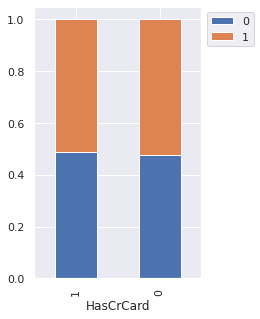

IsActiveMember     0     1    All
IsActiveMember                   
0               4849     0   4849
All             4849  5151  10000
1                  0  5151   5151
------------------------------------------------------------------------------------------------------------------------


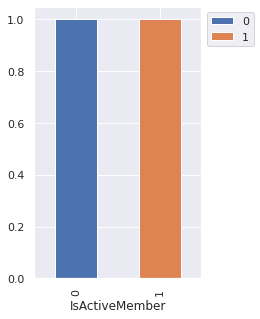

IsActiveMember     0     1    All
Tenure                           
All             4849  5151  10000
9                513   471    984
5                506   506   1012
8                506   519   1025
7                493   535   1028
4                489   500    989
2                488   560   1048
3                485   524   1009
6                468   499    967
1                466   569   1035
10               241   249    490
0                194   219    413
------------------------------------------------------------------------------------------------------------------------


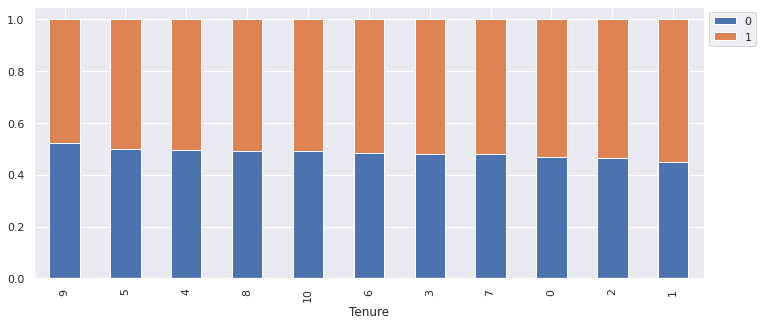

In [50]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"IsActiveMember")

Tenure           0     1     2     3    4     5    6     7     8    9   10  \
NumOfProducts                                                                
All            413  1035  1048  1009  989  1012  967  1028  1025  984  490   
1              236   568   473   529  504   501  490   517   525  500  241   
2              171   431   543   430  462   468  456   482   468  451  228   
3                6    32    21    42   20    36   17    24    28   23   17   
4                0     4    11     8    3     7    4     5     4   10    4   

Tenure           All  
NumOfProducts         
All            10000  
1               5084  
2               4590  
3                266  
4                 60  
------------------------------------------------------------------------------------------------------------------------


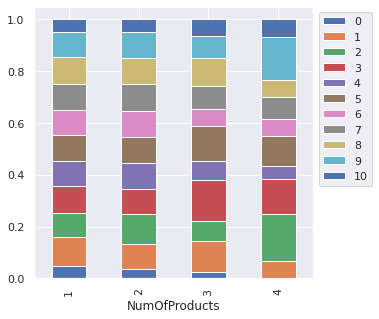

Tenure       0     1     2     3    4     5    6     7     8    9   10    All
HasCrCard                                                                    
All        413  1035  1048  1009  989  1012  967  1028  1025  984  490  10000
1          268   701   738   730  709   700  694   726   742  692  355   7055
0          145   334   310   279  280   312  273   302   283  292  135   2945
------------------------------------------------------------------------------------------------------------------------


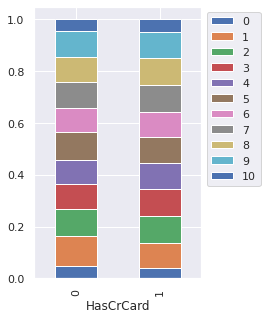

Tenure            0     1     2     3    4     5    6     7     8    9   10  \
IsActiveMember                                                                
All             413  1035  1048  1009  989  1012  967  1028  1025  984  490   
1               219   569   560   524  500   506  499   535   519  471  249   
0               194   466   488   485  489   506  468   493   506  513  241   

Tenure            All  
IsActiveMember         
All             10000  
1                5151  
0                4849  
------------------------------------------------------------------------------------------------------------------------


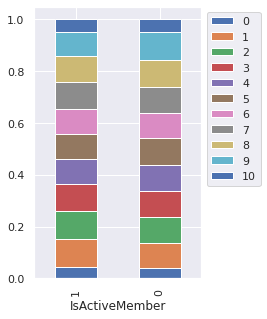

Tenure    0     1     2     3    4     5    6     7     8    9   10    All
Tenure                                                                    
0       413     0     0     0    0     0    0     0     0    0    0    413
All     413  1035  1048  1009  989  1012  967  1028  1025  984  490  10000
1         0  1035     0     0    0     0    0     0     0    0    0   1035
2         0     0  1048     0    0     0    0     0     0    0    0   1048
3         0     0     0  1009    0     0    0     0     0    0    0   1009
4         0     0     0     0  989     0    0     0     0    0    0    989
5         0     0     0     0    0  1012    0     0     0    0    0   1012
6         0     0     0     0    0     0  967     0     0    0    0    967
7         0     0     0     0    0     0    0  1028     0    0    0   1028
8         0     0     0     0    0     0    0     0  1025    0    0   1025
9         0     0     0     0    0     0    0     0     0  984    0    984
10        0     0     0  

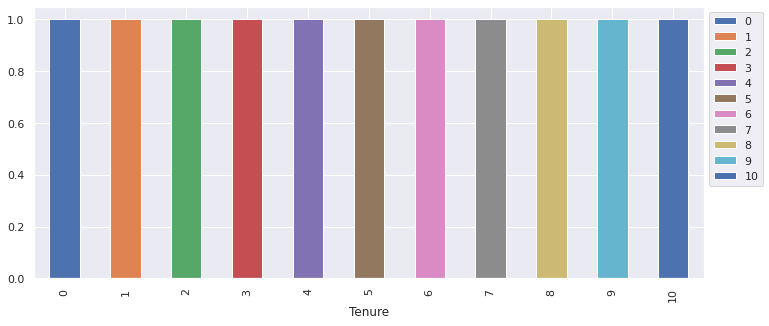

In [51]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Tenure")

In [52]:
# Encode categorical variaBLES WITH  get dummies


#tmp_data = pd.get_dummies(tmp_data,drop_first=True)
data_copy = data_copy # wdataset needs to be float to convert to tensors later
data_copy.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [53]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [54]:
data1 = data.copy()





### 7) Build ANN mode for classification

- Define feature matrices x and y 
- Define train, test and val 
- scale data using scaler to standardize all data 
- Convert data into numpy vectors using .reshape
- Instantiate model
- Add input layer
- add hidden layers 
- add output layers

In [55]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [56]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [58]:
copy_df = data.copy()

In [59]:
data1 = pd.DataFrame(data = copy_df, columns= data.columns, index = data.index)
data1.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [60]:
# make copy of data
df_copy= data.copy()
# drop unneeded columns
df_copy.drop(columns=["RowNumber","CustomerId","Surname"], axis =1, inplace = True)
df_copy = pd.get_dummies(df_copy)

In [61]:
df_copy.head(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [62]:
# define feature matrices X and y 

X = df_copy.drop(columns="Exited")
Y = df_copy['Exited']

# splitting the data into train, test and val

#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
#Splitting the train set into  dev set and training set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [63]:
# scale the data using standard scaler

from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()

# use fit transform on X_train, Xtrain learns from fit_transform, x_test is used on 
# .transform function

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# convert x_train and x_test to tensor obejct

X_train_tens = tf.convert_to_tensor(X_train_scaled)
X_test_tens = tf.convert_to_tensor(X_test_scaled)

# convert y_train and y_test to tensor object

y_train_tens = tf.convert_to_tensor(y_train)
y_test_tens = tf.convert_to_tensor(y_test)


In [64]:
len(X_train_scaled)

7000

In [65]:
# convert data into tensors

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam # Optimizer

## define function to make confusion matrix
- import libraries 
- make confusion matrix function


In [66]:
from sklearn.metrics import confusion_matrix

In [67]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Epoch 1/500
39/39 [==============================] - 2s 8ms/step - loss: 0.8524 - accuracy: 0.2355 - val_loss: 0.7596 - val_accuracy: 0.2086
Epoch 2/500
39/39 [==============================] - 0s 4ms/step - loss: 0.8219 - accuracy: 0.2549 - val_loss: 0.7409 - val_accuracy: 0.2271
Epoch 3/500
39/39 [==============================] - 0s 4ms/step - loss: 0.7871 - accuracy: 0.2961 - val_loss: 0.7258 - val_accuracy: 0.2838
Epoch 4/500
39/39 [==============================] - 0s 4ms/step - loss: 0.7642 - accuracy: 0.3259 - val_loss: 0.7130 - val_accuracy: 0.3571
Epoch 5/500
39/39 [==============================] - 0s 5ms/step - loss: 0.7504 - accuracy: 0.3682 - val_loss: 0.7010 - val_accuracy: 0.4614
Epoch 6/500
39/39 [==============================] - 0s 4ms/step - loss: 0.7312 - accuracy: 0.4204 - val_loss: 0.6901 - val_accuracy: 0.5738
Epoch 7/500
39/39 [==============================] - 0s 4ms/step - loss: 0.7139 - accuracy: 0.4782 - val_loss: 0.6796 - val_accuracy: 0.6490
Epoch 8/500
3

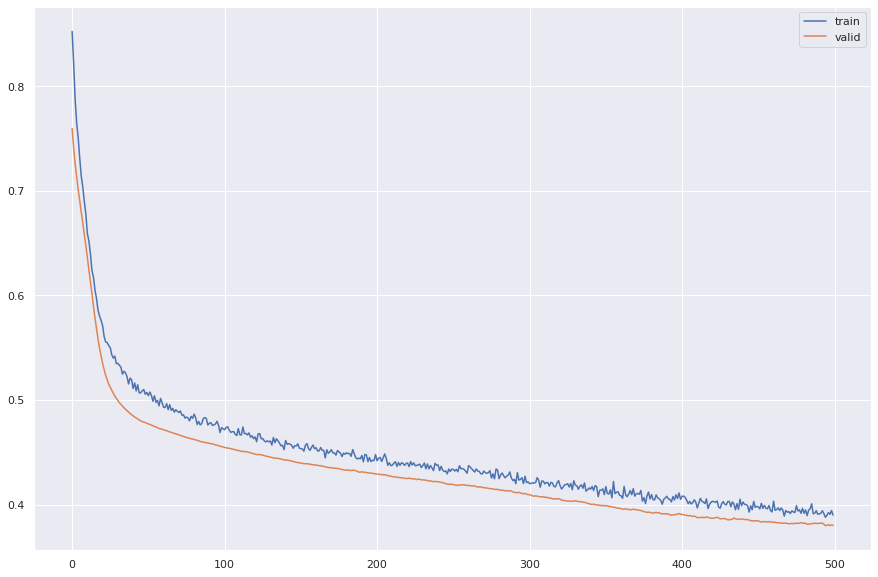

In [68]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train_tens.shape[1]))

model.add(Dense(13, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(20, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))

# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = "binary_crossentropy", metrics=['accuracy'])

history = model.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=500, verbose=1)

# graph learning rate vs epochs 

# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);


In [69]:
# make function to plot roc curve and obtain AUC

!pip install plot-metric


In [87]:
  from plot_metric.functions import BinaryClassification
  def graph_roc_curve(model,X_train, y_train):
    y_pred = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    max_idx = np.argmax(tpr-fpr)
    optimal_threshold = thresholds[max_idx]
   
    binClassifier = BinaryClassification(y_train,y_pred, labels = ["Class 1", "Class 2"], threshold=optimal_threshold)
# figures
    plt.figure(figsize=(10,10))
    binClassifier.plot_roc_curve()
    plt.show()


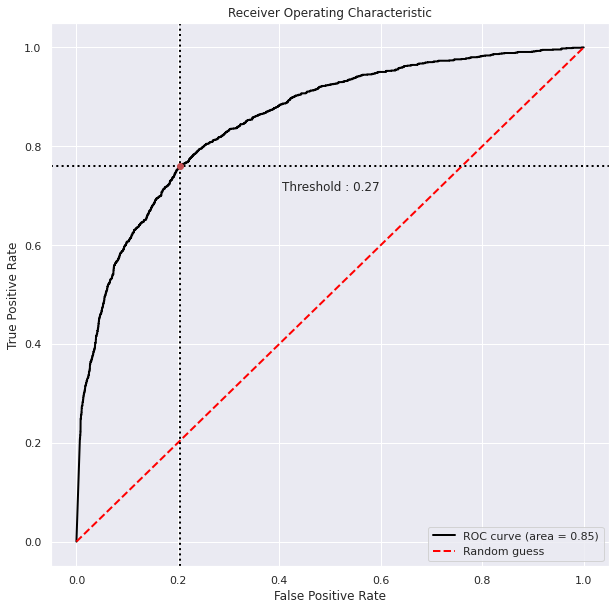

In [88]:
graph_roc_curve(model,X_train_tens,y_train_tens)

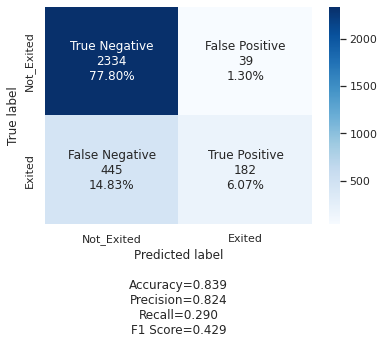

In [72]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(X_test_tens)
for i in range(len(y_test_tens)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test_tens, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

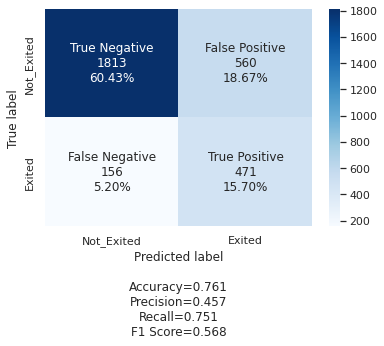

In [118]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### insights with above model, overfitting the data as the valid and training loss are divergent and not converging. This model is overfitting very severely



Epoch 1/300
77/77 [==============================] - 1s 6ms/step - loss: 0.6871 - accuracy: 0.5831 - val_loss: 0.6919 - val_accuracy: 0.5143
Epoch 2/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.6016 - val_loss: 0.6900 - val_accuracy: 0.5433
Epoch 3/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6157 - val_loss: 0.6881 - val_accuracy: 0.5790
Epoch 4/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.6422 - val_loss: 0.6862 - val_accuracy: 0.6143
Epoch 5/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.6690 - val_loss: 0.6843 - val_accuracy: 0.6438
Epoch 6/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.6684 - val_loss: 0.6825 - val_accuracy: 0.6605
Epoch 7/300
77/77 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.6967 - val_loss: 0.6807 - val_accuracy: 0.6800
Epoch 8/300
7

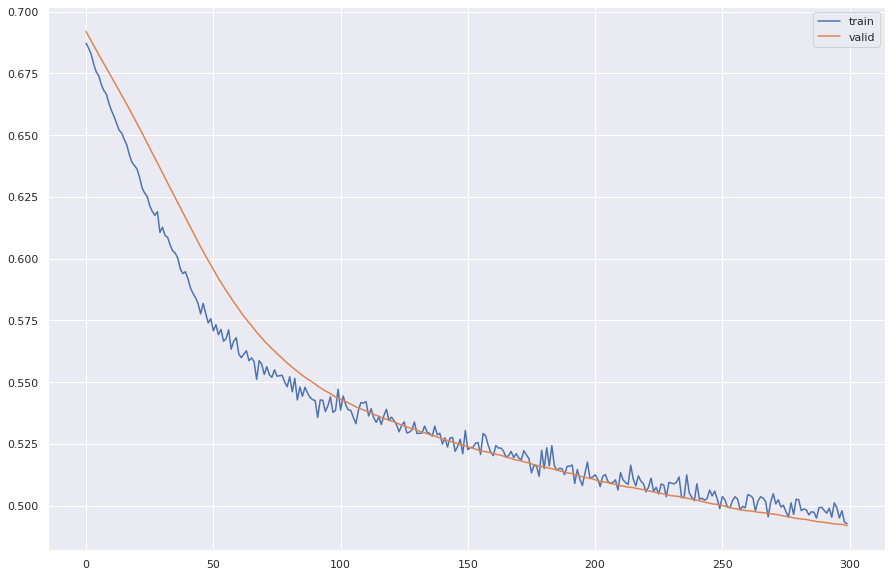

In [77]:
# modify parameters of neural network to see if accuracy can increase

# add more hidden layers


model2 = tf.keras.Sequential()
model2.add(InputLayer(input_shape=X_train_tens.shape[1]))

model2.add(Dense(13, kernel_initializer='he_normal', activation = 'relu'))
model.add(Dropout(.3))
model2.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model2.add(Dropout(0.5)) 
model2.add(Dense(20,kernel_initializer='he_normal', activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(20, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model2.compile(optimizer=Adam(lr=0.00001), loss = "binary_crossentropy", metrics=['accuracy'])

history = model2.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=64, epochs=300, verbose=1)

# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);


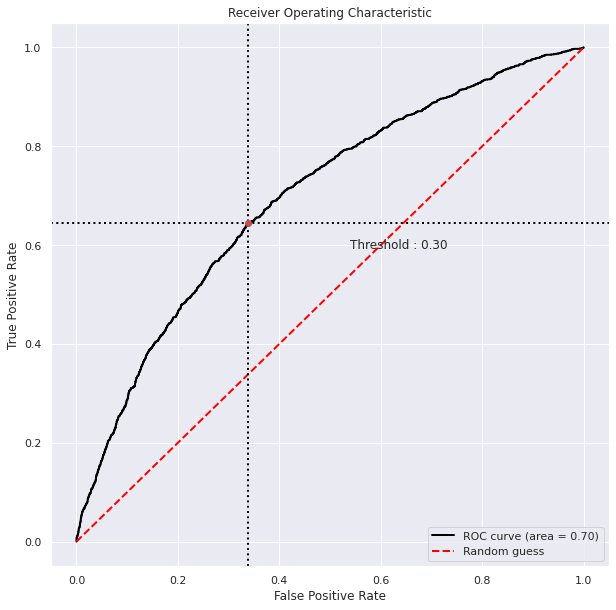

In [89]:
graph_roc_curve(model2,X_train_tens, y_train_tens)

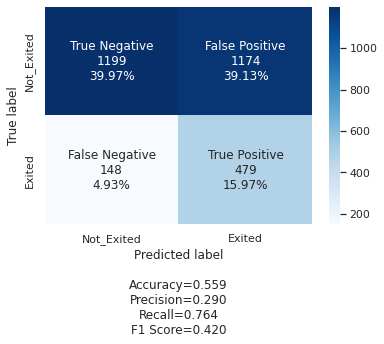

In [119]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model2.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model2.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### insights 
- At around 250 Epochs the valid loss starts to increase the model is being overfit again.
- Next model, try lowering the learning rate and increasing batch size, run 250 epochs

Epoch 1/500
20/20 [==============================] - 1s 13ms/step - loss: 1.1223 - accuracy: 0.5437 - val_loss: 0.7308 - val_accuracy: 0.5443
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1462 - accuracy: 0.5392 - val_loss: 0.7299 - val_accuracy: 0.5438
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1127 - accuracy: 0.5506 - val_loss: 0.7289 - val_accuracy: 0.5443
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 1.0861 - accuracy: 0.5543 - val_loss: 0.7280 - val_accuracy: 0.5457
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1090 - accuracy: 0.5516 - val_loss: 0.7270 - val_accuracy: 0.5481
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1153 - accuracy: 0.5447 - val_loss: 0.7261 - val_accuracy: 0.5490
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 1.1073 - accuracy: 0.5453 - val_loss: 0.7251 - val_accuracy: 0.5490
Epoch 8/500


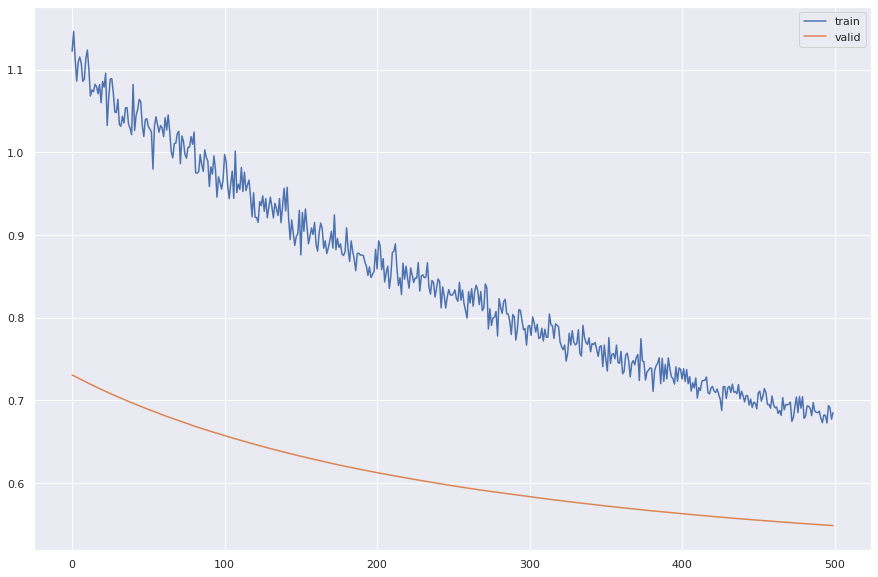

In [80]:
model3 = tf.keras.Sequential()
model3.add(InputLayer(input_shape=X_train_tens.shape[1]))

model3.add(Dense(13, kernel_initializer='he_normal', activation = 'relu'))
model3.add(Dropout(.3))
model3.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model3.add(Dropout(0.5)) 
model3.add(Dense(20,kernel_initializer='he_normal', activation = 'relu'))
#model3.add(Dropout(0.5))
#model3.add(Dense(20, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model3.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

model3.compile(optimizer=Adam(lr=0.000005), loss = "binary_crossentropy", metrics=['accuracy'])

history = model3.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=256, epochs=500, verbose=1)


# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

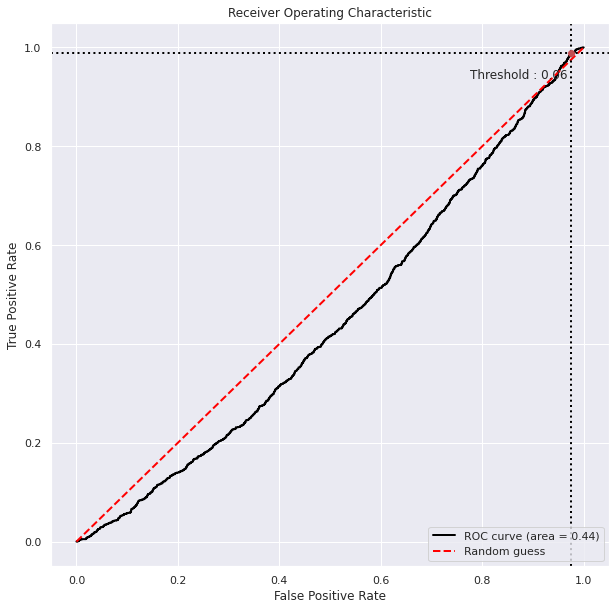

In [90]:
graph_roc_curve(model3,X_train_tens,y_train_tens)

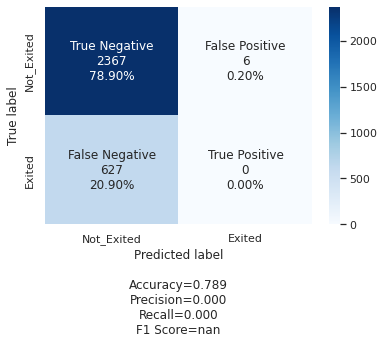

In [91]:
## Confusion Matrix on unsee test set
y_pred1 = model3.predict(X_test_tens)
for i in range(len(y_test_tens)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test_tens, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

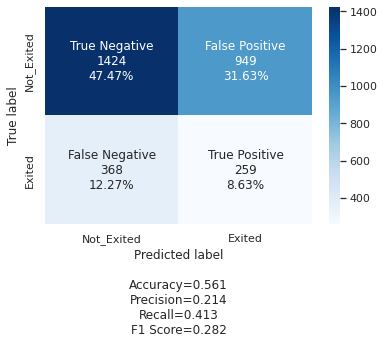

In [120]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model3.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model3.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

In [ ]:
# import keras to use SGD 
from tensorflow import keras

*italicized text*

Epoch 1/128
20/20 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.7078 - val_loss: 0.5486 - val_accuracy: 0.7976
Epoch 2/128
20/20 [==============================] - 0s 5ms/step - loss: 0.6781 - accuracy: 0.7071 - val_loss: 0.5484 - val_accuracy: 0.7976
Epoch 3/128
20/20 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.7076 - val_loss: 0.5483 - val_accuracy: 0.7976
Epoch 4/128
20/20 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.7073 - val_loss: 0.5482 - val_accuracy: 0.7976
Epoch 5/128
20/20 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.6994 - val_loss: 0.5481 - val_accuracy: 0.7976
Epoch 6/128
20/20 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.7086 - val_loss: 0.5480 - val_accuracy: 0.7976
Epoch 7/128
20/20 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.7104 - val_loss: 0.5478 - val_accuracy: 0.7976
Epoch 8/128
2

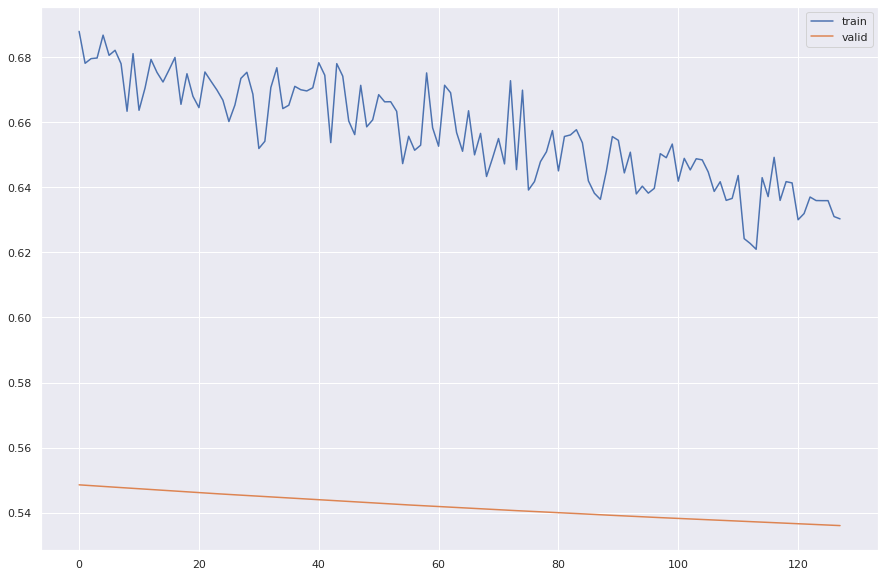

In [92]:
model4 = tf.keras.Sequential()
model4.add(InputLayer(input_shape=X_train_tens.shape[1]))

model4.add(Dense(13, kernel_initializer='he_normal', activation = 'relu'))
model4.add(Dropout(.3))
model4.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model4.add(Dropout(0.5)) 
model4.add(Dense(20,kernel_initializer='he_normal', activation = 'relu'))
#model3.add(Dropout(0.5))
#model3.add(Dense(20, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model4.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.000015,nesterov=True, momentum=.5, decay = .01)
model4.compile(optimizer=opt, loss = "binary_crossentropy", metrics=['accuracy'])

history = model3.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=256, epochs=128, verbose=1)


# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

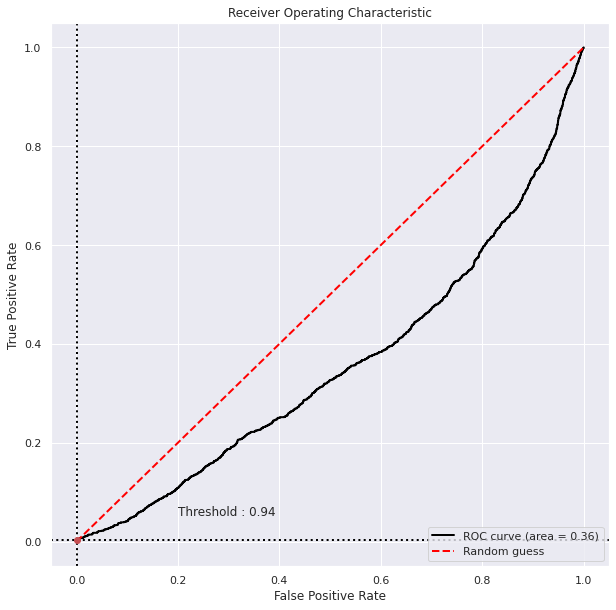

In [93]:
graph_roc_curve(model4, X_train_tens, y_train_tens)

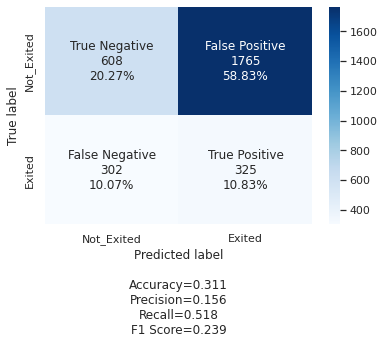

In [121]:
## Confusion Matrix on unsee test set
y_pred1 = model4.predict(X_test_tens)
for i in range(len(y_test_tens)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test_tens, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

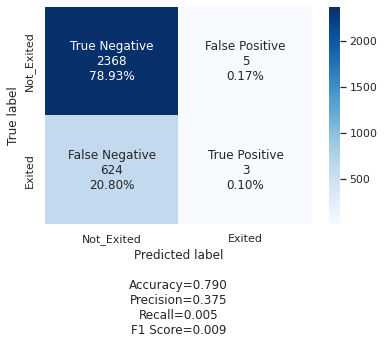

In [122]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model4.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model4.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### Hypertune neural network
-use gridsearchcv method to hypertune 


In [94]:
total_0 = y_train.value_counts()[0]
total_1 = y_train.value_counts()[1]
total= total_0+total_1

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / total_0) * (total / 2.0)
weight_for_1 = (1 / total_1) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.48


Epoch 1/700
39/39 [==============================] - 1s 9ms/step - loss: 0.8314 - accuracy: 0.7916 - val_loss: 0.5955 - val_accuracy: 0.7995
Epoch 2/700
39/39 [==============================] - 0s 5ms/step - loss: 0.8202 - accuracy: 0.7871 - val_loss: 0.6026 - val_accuracy: 0.7995
Epoch 3/700
39/39 [==============================] - 0s 4ms/step - loss: 0.8013 - accuracy: 0.7837 - val_loss: 0.6093 - val_accuracy: 0.7990
Epoch 4/700
39/39 [==============================] - 0s 5ms/step - loss: 0.7822 - accuracy: 0.7782 - val_loss: 0.6159 - val_accuracy: 0.7986
Epoch 5/700
39/39 [==============================] - 0s 6ms/step - loss: 0.7869 - accuracy: 0.7720 - val_loss: 0.6220 - val_accuracy: 0.7986
Epoch 6/700
39/39 [==============================] - 0s 5ms/step - loss: 0.7659 - accuracy: 0.7635 - val_loss: 0.6278 - val_accuracy: 0.7971
Epoch 7/700
39/39 [==============================] - 0s 5ms/step - loss: 0.7711 - accuracy: 0.7618 - val_loss: 0.6335 - val_accuracy: 0.7948
Epoch 8/700
3

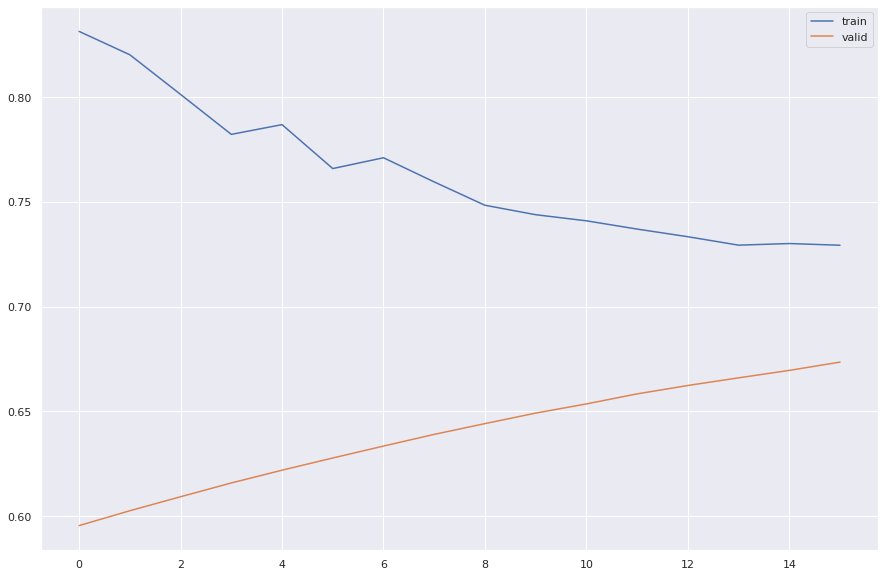

In [95]:
# first before hypertuning 
# add class weight to 1 st model and rerun and see results 
# add early stopping to model to prevent model from running if no improvement is gained 


#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
"""
monitor: Quantity to be monitored.
min_delta: Minimum change in the monitored quantity to qualify as an improvement, 
i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped.
mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped 
decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the 
direction is automatically inferred from the name of the monitored quantity.
restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. 
If False, the model weights obtained at the last step of training are used.
"""



model5 = tf.keras.Sequential()
model5.add(InputLayer(input_shape=X_train_tens.shape[1]))

model5.add(Dense(13, activation = 'relu'))
# model.add(Dropout(0.3))
model5.add(Dense(20, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model5.add(Dropout(0.5)) 
model5.add(Dense(20, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(14, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))

# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer=Adam(lr=0.00005,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model5.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=700, verbose=1, class_weight=class_weight, callbacks=[es])

# graph learning rate vs epochs 

# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);



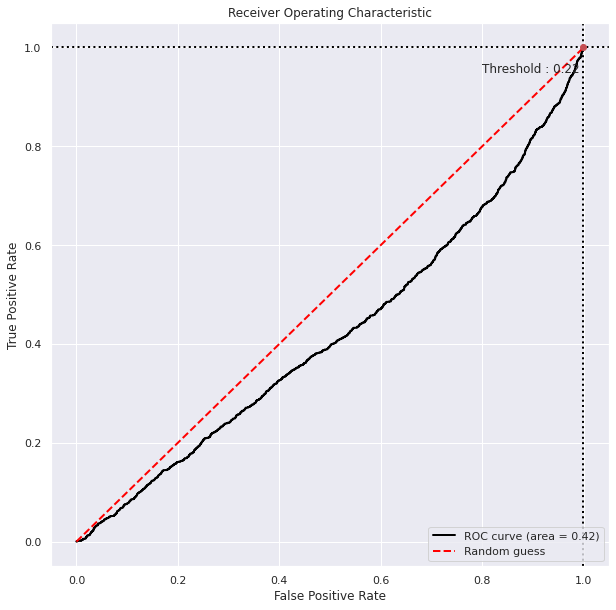

In [96]:
graph_roc_curve(model5,X_train_tens,y_train_tens)

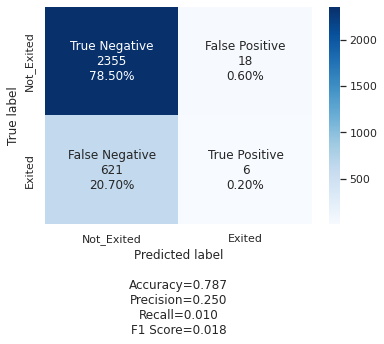

In [123]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model5.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model5.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

In [ ]:
#To hypertune parameters use keras classifier and build instance
# of model
# use classifier to pass it build model as an argument of the function
# with the classifier we can pass the whole model as an esitmator parameter in gridsearch cv

from tensorflow import keras # importing keras library
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_model(optimizer):
    model = tf.keras.Sequential()
    model.add(InputLayer(input_shape=X_train_tens.shape[1]))

    model.add(Dense(13, kernel_initializer= 'he_normal', activation = 'relu'))

    model.add(Dense(20, kernel_initializer= 'he_normal', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, kernel_initializer= 'he_normal', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(14, kernel_initializer= 'he_normal', activation = 'relu'))

    model.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))

    model.compile(optimizer=optimizer, loss = "binary_crossentropy", metrics=['accuracy'])
    #X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=700, verbose=1, class_weight=class_weight, callbacks=[es])

    return model

model = KerasClassifier(build_fn = build_model)
parameters = {'batch_size': [32,64,128,256],
              'epochs': [50,100],
              'optimizer': ['adam', 'rmsprop']}

     
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)

grid_search = grid_search.fit(X_train_scaled, y_train,verbose = 1,class_weight=class_weight, validation_split = 0.3, callbacks = [es])
#grid_search = grid_search.fit(X_train_scaled, y_train_tens,verbose = 1)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print(best_accuracy)
print(best_parameters)

### insights about neural networks and model building 

- model 1 gave the best results
- this was the base model for hypertuning
- This model had the highest AUC @ .85
  - meaning this model had the highest probablity of having true positives occur.

### The metric that was choosen is recall, we want to maximize true positives(customers churning actually) and minimize false negatives(predicting customers leaving bank but they didnt) 

### Take model parameters from best_params and build model, change learning rate and build other models

### USE opitmal threshold and use that to calculate model predictions in the confusion matrix

In [97]:
# build model with hypertuned parameter LR = .001
model6 = tf.keras.Sequential()
model6.add(InputLayer(input_shape=X_train_tens.shape[1]))



model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model6.add(Dropout(0.5))
model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model6.add(Dropout(0.5))
model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model6.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model6.compile(optimizer=Adam(lr=0.001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model6.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=132, epochs=100, verbose=1, class_weight=class_weight, callbacks=[es])


Epoch 1/100
38/38 [==============================] - 1s 8ms/step - loss: 0.9223 - accuracy: 0.6647 - val_loss: 0.6403 - val_accuracy: 0.7105
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7242 - accuracy: 0.4369 - val_loss: 0.7503 - val_accuracy: 0.2457
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.7156 - accuracy: 0.3980 - val_loss: 0.7035 - val_accuracy: 0.4371
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6997 - accuracy: 0.4318 - val_loss: 0.6917 - val_accuracy: 0.5029
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.4422 - val_loss: 0.6893 - val_accuracy: 0.5205
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4441 - val_loss: 0.6877 - val_accuracy: 0.5300
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.4776 - val_loss: 0.6786 - val_accuracy: 0.5781
Epoch 8/100
3

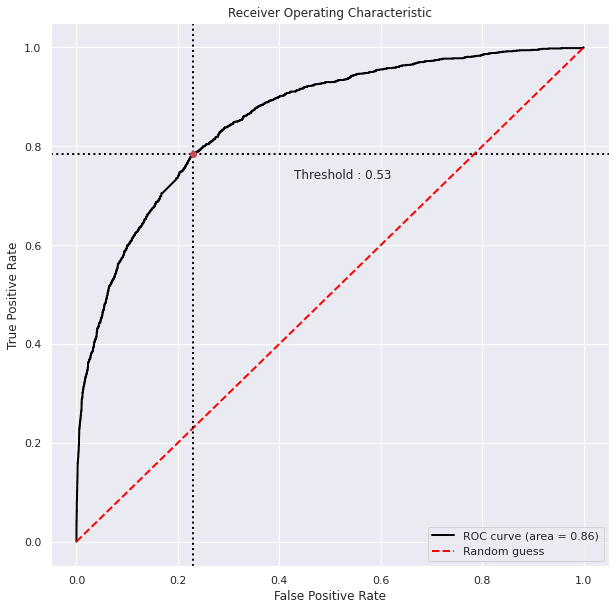

In [98]:
graph_roc_curve(model6,X_train_tens,y_train_tens)

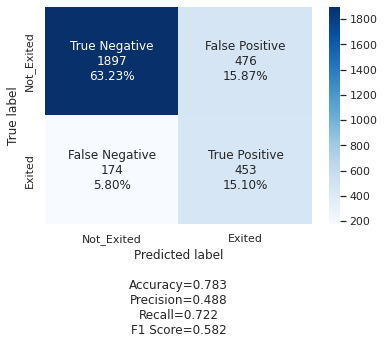

In [125]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model6.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model6.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 0.7565 - accuracy: 0.4900 - val_loss: 0.7227 - val_accuracy: 0.4138
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7414 - accuracy: 0.5243 - val_loss: 0.7147 - val_accuracy: 0.4467
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7360 - accuracy: 0.5318 - val_loss: 0.7077 - val_accuracy: 0.4862
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7360 - accuracy: 0.5361 - val_loss: 0.7047 - val_accuracy: 0.5038
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7285 - accuracy: 0.5410 - val_loss: 0.7022 - val_accuracy: 0.5210
Epoch 6/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7252 - accuracy: 0.5578 - val_loss: 0.7005 - val_accuracy: 0.5376
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7106 - accuracy: 0.5512 - val_loss: 0.6997 - val_accuracy: 0.5457

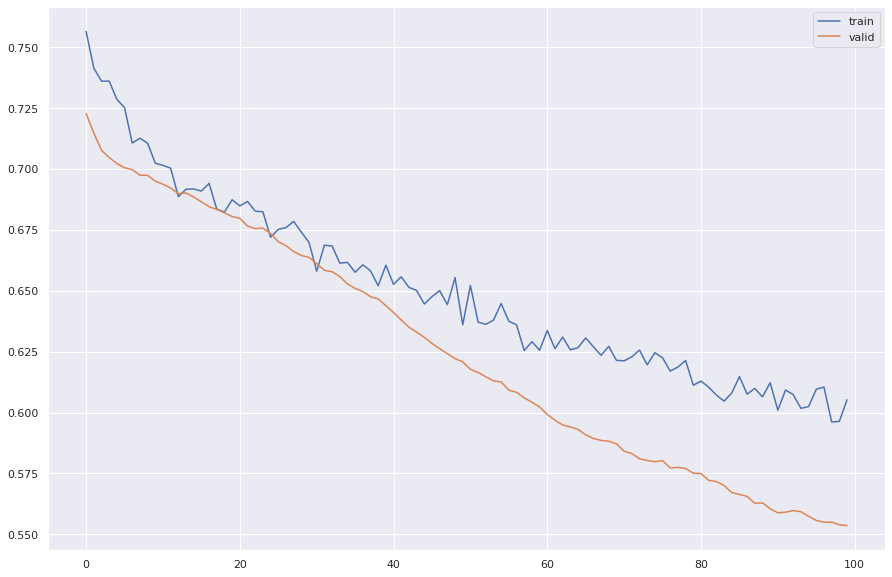

In [99]:
# build model with .0001 learning rate
model7 = tf.keras.Sequential()
model7.add(InputLayer(input_shape=X_train_tens.shape[1]))



model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model7.add(Dropout(0.5))
model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model7.add(Dropout(0.5))
model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model7.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model7.compile(optimizer=Adam(lr=0.0001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model7.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=32, epochs=100, verbose=1, class_weight=class_weight, callbacks=[es])
# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

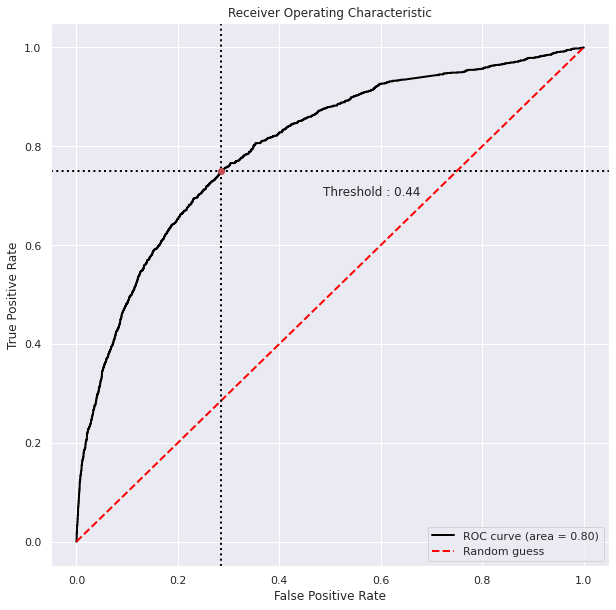

In [103]:
graph_roc_curve(model7,X_train_tens,y_train_tens)

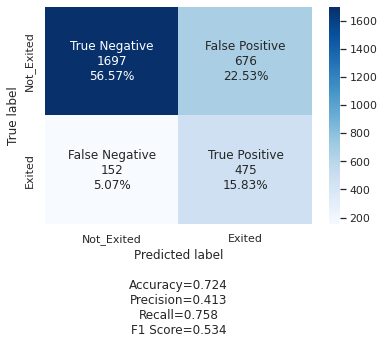

In [126]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model7.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model7.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 2.3855 - accuracy: 0.6982 - val_loss: 0.8432 - val_accuracy: 0.7990
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 2.4028 - accuracy: 0.6831 - val_loss: 0.8284 - val_accuracy: 0.7990
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 2.2107 - accuracy: 0.6953 - val_loss: 0.8153 - val_accuracy: 0.7990
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 2.3036 - accuracy: 0.6878 - val_loss: 0.8023 - val_accuracy: 0.7986
Epoch 5/100
154/154 [==============================] - 1s 4ms/step - loss: 2.1294 - accuracy: 0.6827 - val_loss: 0.7900 - val_accuracy: 0.7981
Epoch 6/100
154/154 [==============================] - 1s 4ms/step - loss: 2.0881 - accuracy: 0.6835 - val_loss: 0.7787 - val_accuracy: 0.7981
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 2.0350 - accuracy: 0.6665 - val_loss: 0.7677 - val_accuracy: 0.7967

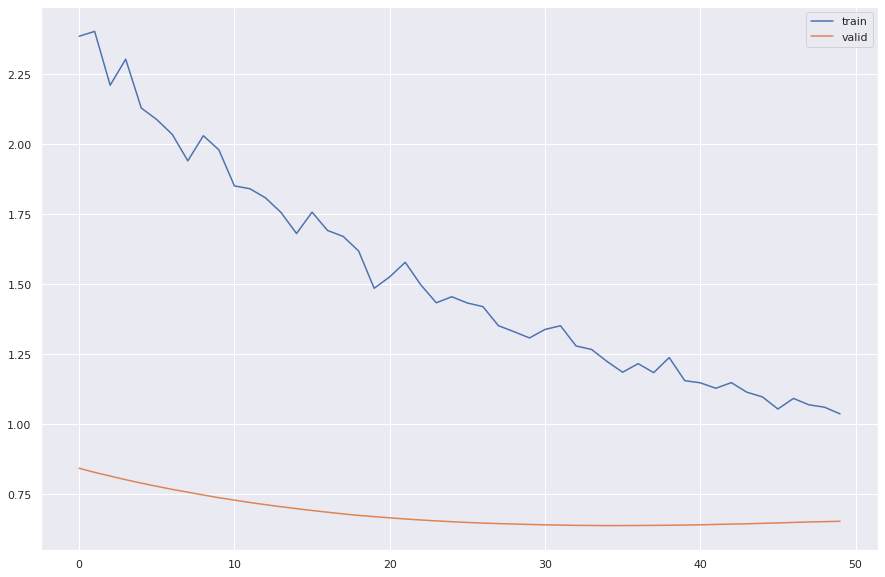

In [104]:
# build model with .00001 learning rate 

# build model with .0001 learning rate
model8 = tf.keras.Sequential()
model8.add(InputLayer(input_shape=X_train_tens.shape[1]))



model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model8.add(Dropout(0.5))
model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model8.add(Dropout(0.5))
model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model8.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model8.compile(optimizer=Adam(lr=0.00001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model8.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=32, epochs=100, verbose=1, class_weight=class_weight, callbacks=[es])
# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

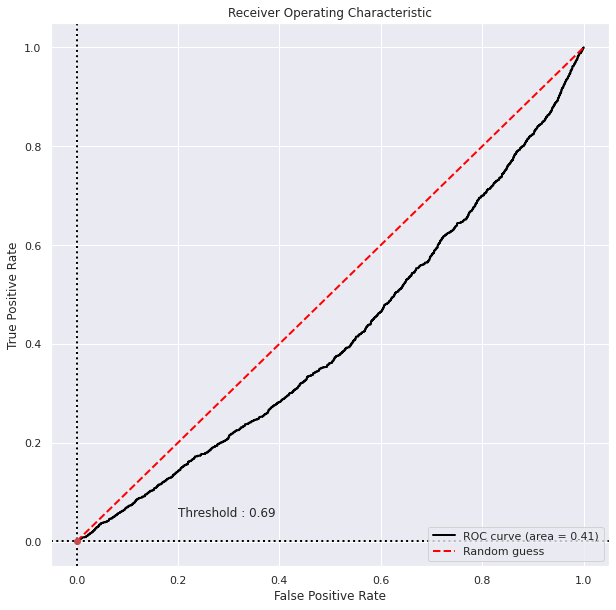

In [105]:
graph_roc_curve(model8,X_train_tens,y_train_tens)

Epoch 1/400
77/77 [==============================] - 1s 6ms/step - loss: 1.0294 - accuracy: 0.4561 - val_loss: 0.7193 - val_accuracy: 0.5862
Epoch 2/400
77/77 [==============================] - 0s 4ms/step - loss: 0.7817 - accuracy: 0.4929 - val_loss: 0.6739 - val_accuracy: 0.7057
Epoch 3/400
77/77 [==============================] - 0s 5ms/step - loss: 0.7221 - accuracy: 0.5412 - val_loss: 0.6757 - val_accuracy: 0.6895
Epoch 4/400
77/77 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.5637 - val_loss: 0.6556 - val_accuracy: 0.7624
Epoch 5/400
77/77 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.5527 - val_loss: 0.6517 - val_accuracy: 0.7710
Epoch 6/400
77/77 [==============================] - 0s 6ms/step - loss: 0.6972 - accuracy: 0.5804 - val_loss: 0.6555 - val_accuracy: 0.7662
Epoch 7/400
77/77 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5943 - val_loss: 0.6458 - val_accuracy: 0.7819
Epoch 8/400
7

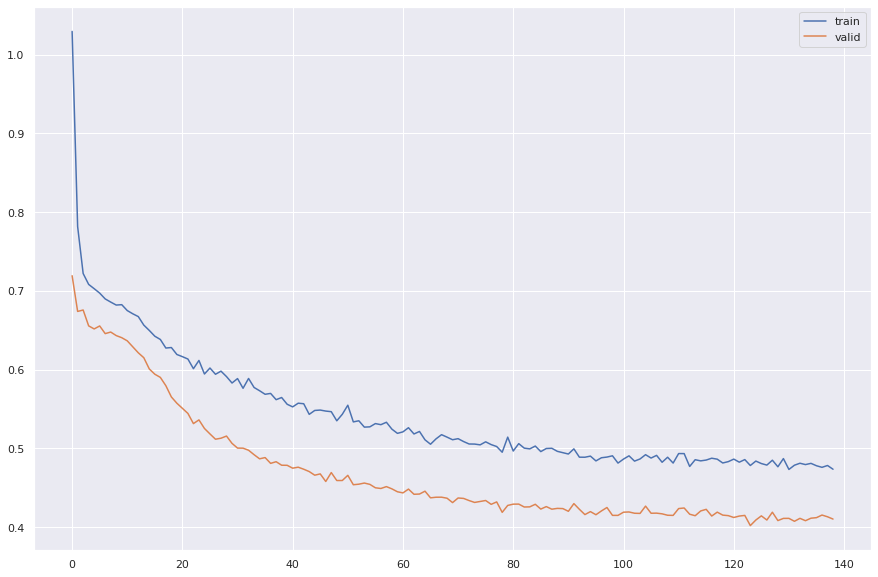

In [106]:
# build model with hypertuned parameter LR = .001
model9 = tf.keras.Sequential()
model9.add(InputLayer(input_shape=X_train_tens.shape[1]))



model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model9.add(Dropout(0.5))
model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model9.add(Dropout(0.5))
model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model9.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model9.compile(optimizer=Adam(lr=0.001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model9.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=64, epochs=400, verbose=1, class_weight=class_weight, callbacks=[es])
# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);


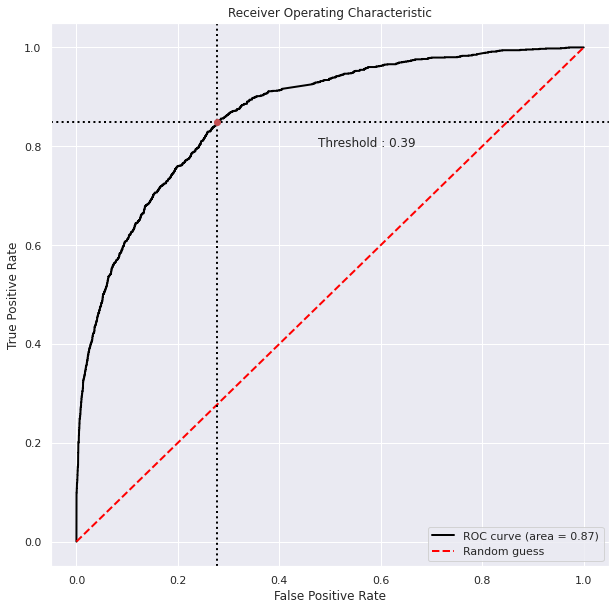

In [107]:
graph_roc_curve(model9,X_train_tens,y_train_tens)

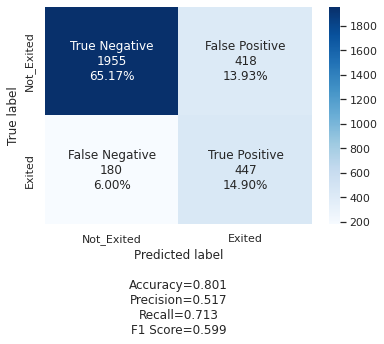

In [127]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model9.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model9.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### Conclusions and business reccomendations 

- The model can account 75% accuaracy and 76% recall 
  - This was acheived by using a threshold from the optimal threshold on the ROC curve by determining the optimal threshold for all of the values of [tpr-fpr]
  - I also took into account of the class weight imabalance and used the class weights from each class of the "Exited" column to further improve the model as well.  
- so approx 25% of the customers it can't predict for
 - This is the highest recall that i have achieved throughout the models. 
 - This model could be further tuned and perhaps improved, to further reduce loss and improve model performance. 
 - The bank should try and offer more incentives to get the customers to sign up for more products
  - this may help retain customers for longer tenure periods as well. 
